<a href="https://colab.research.google.com/github/PeixotoJr/APD/blob/main/Series_Temporais_SELIC_IPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de Bibliotecas
* pandas: Biblioteca para manipulação e análise de
dados. Usada para carregar e manipular os dados das séries temporais.
* matplotlib.pyplot: Biblioteca para criação de gráficos. Usada para plotar os dados e previsões.
* seaborn: Biblioteca para visualização de dados que trabalha sobre o matplotlib. (Não está sendo utilizada diretamente no código, mas é importada e pode ser usada para aprimorar visualizações.)
* statsmodels.api: Biblioteca para modelagem estatística. Inclui a função AutoReg para criar modelos autoregressivos.
 AutoReg: Classe da statsmodels para criar modelos autoregressivos.
* requests: Biblioteca para fazer requisições HTTP. Usada para baixar os dados da API do Banco Central.
* StringIO: Classe do módulo io para manipular strings como arquivos. Usada para ler os dados CSV obtidos pela requisição HTTP.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import requests
from io import StringIO

# Função para Baixar Dados
* series_id: Identificador da série temporal a ser baixada (IPCA ou SELIC).
* start_date e end_date: Datas de início e fim para o período desejado.
* url: Constrói a URL da API do Banco Central para baixar os dados no formato CSV.
* requests.get(url): Faz a requisição HTTP para obter os dados.
* pd.read_csv(StringIO(response.text), sep=';'): Lê os dados CSV da resposta HTTP, usando StringIO para tratar o texto como um arquivo.
* data['data']: Converte a coluna de datas para o formato datetime.
* data['valor']: Substitui a vírgula por ponto na coluna de valores e converte para tipo float.

In [2]:
# Função para baixar dados da API do Banco Central do Brasil
def download_bc_data(series_id, start_date, end_date):
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{series_id}/dados?formato=csv&dataInicial={start_date}&dataFinal={end_date}'
    response = requests.get(url)
    data = pd.read_csv(StringIO(response.text), sep=';')
    data['data'] = pd.to_datetime(data['data'], format='%d/%m/%Y')
    data['valor'] = data['valor'].str.replace(',', '.').astype(float)
    return data

# Configuração e Download dos Dados


*  start_date e end_date: Define o intervalo para os dados.
* ipca_id e selic_id: IDs das séries temporais IPCA e SELIC na API.
* download_bc_data(...): Chama a função para baixar os dados das séries.



In [3]:
# Configuração das séries e datas
start_date = '01/08/2010'
end_date = '01/09/2024'
ipca_id = 433  # ID do IPCA na API do Banco Central
selic_id = 4391  # ID da SELIC acumulada no mês na API do Banco Central

# Download dos dados
ipca = download_bc_data(ipca_id, start_date, end_date)
selic = download_bc_data(selic_id, start_date, end_date)

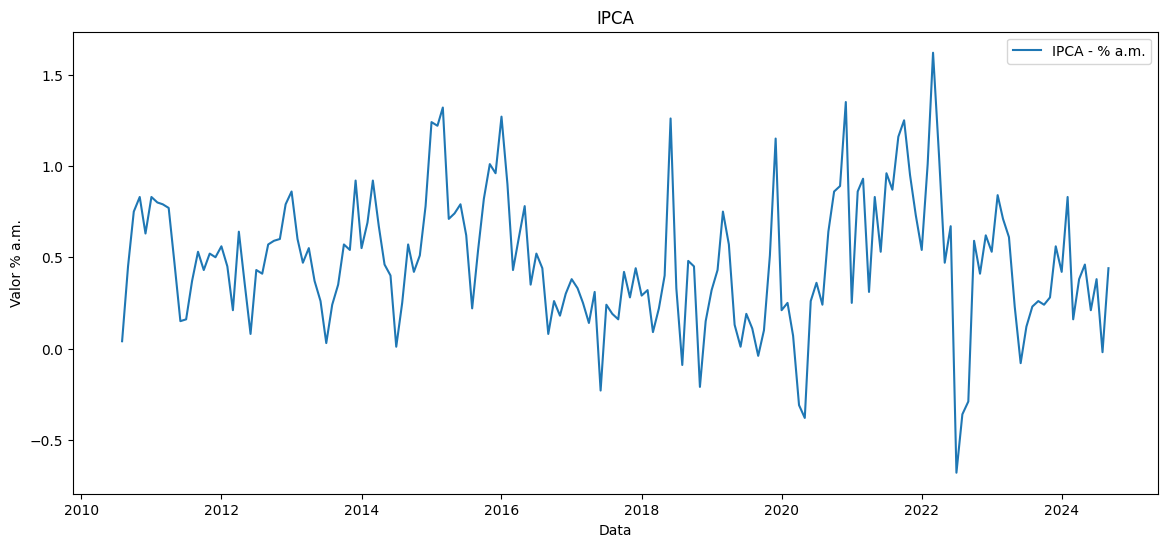

In [4]:
# Plot dos gráficos de linha
plt.figure(figsize=(14, 6))
plt.plot(ipca['data'], ipca['valor'], label='IPCA - % a.m.')
plt.title('IPCA')
plt.xlabel('Data')
plt.ylabel('Valor % a.m.')
plt.legend()
plt.show()

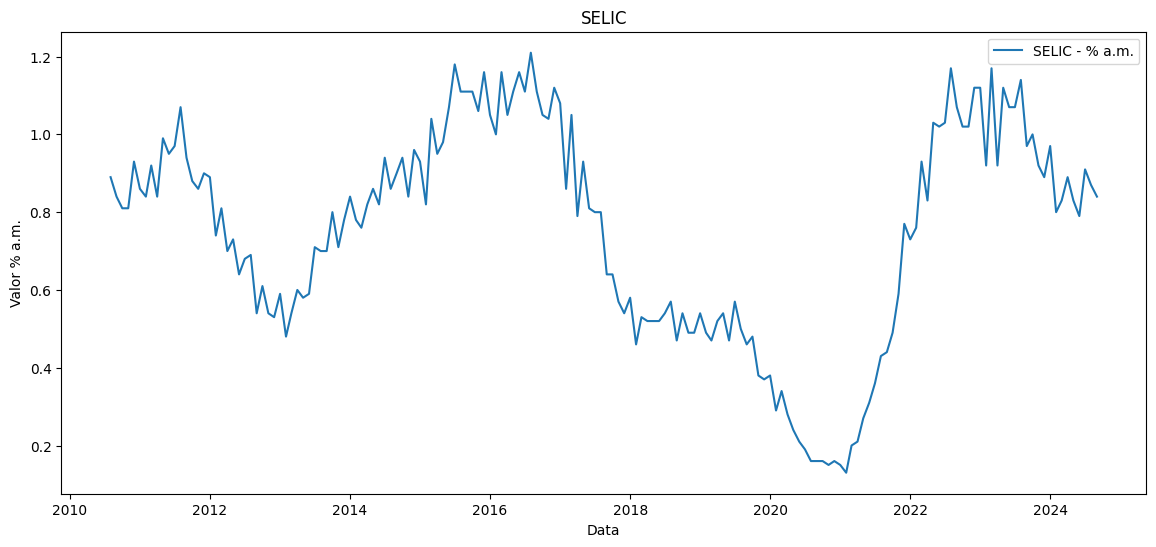

In [5]:
# Plot dos gráficos de linha
plt.figure(figsize=(14, 6))
plt.plot(selic['data'], selic['valor'], label='SELIC - % a.m.')
plt.title('SELIC')
plt.xlabel('Data')
plt.ylabel('Valor % a.m.')
plt.legend()
plt.show()

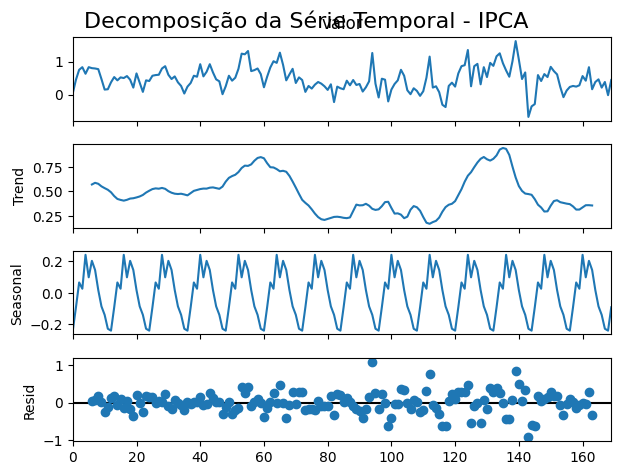

In [6]:
# Decomposição da série temporal - IPCA
decomposition_ipca = sm.tsa.seasonal_decompose(ipca['valor'], model='additive', period=12)
fig = decomposition_ipca.plot()
plt.suptitle('Decomposição da Série Temporal - IPCA', fontsize=16)
plt.show()

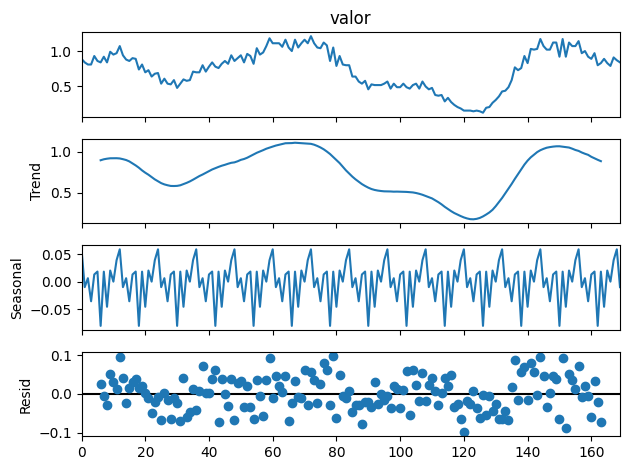

In [7]:
# Decomposição da série temporal - SELIC
decomposition_selic = sm.tsa.seasonal_decompose(selic['valor'], model='additive', period=12)
fig = decomposition_selic.plot()
plt.show()

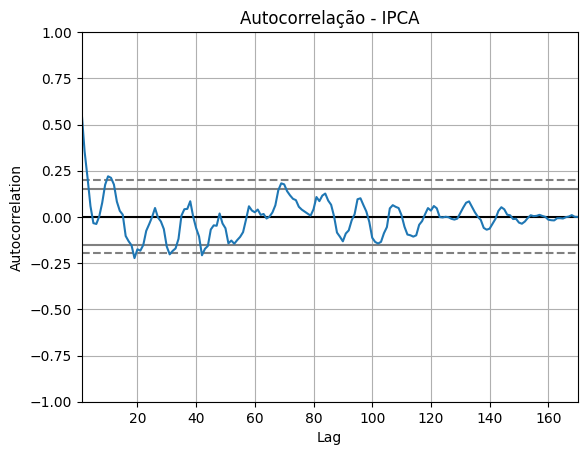

In [8]:
# Cálculo da Autocorrelação - IPCA
pd.plotting.autocorrelation_plot(ipca['valor'])
plt.title('Autocorrelação - IPCA')
plt.show()

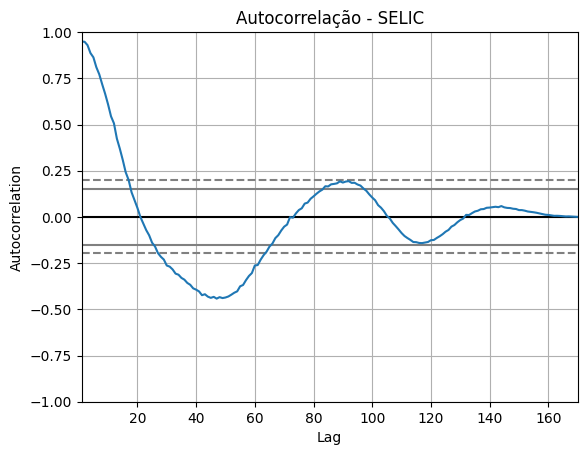

In [9]:
# Cálculo da Autocorrelação - SELIC
pd.plotting.autocorrelation_plot(selic['valor'])
plt.title('Autocorrelação - SELIC')
plt.show()

# Ajuste do Modelo AR para IPCA e SELIC
* AutoReg(...): Cria um modelo autoregressivo usando os dados e o número de lags (12 meses, neste caso).
* fit(): Ajusta o modelo aos dados.
* predict(start=0, end=len(...) - 1): Faz previsões com base no modelo ajustado, para todos os pontos de dados disponíveis.


In [10]:
# Ajuste do modelo AR para IPCA
ipca_model = AutoReg(ipca['valor'], lags=12)  # Usando 12 lags para o modelo AR
ipca_model_fitted = ipca_model.fit()
ipca_predictions = ipca_model_fitted.predict(start=0, end=len(ipca['valor']) - 1)

# Ajuste do modelo AR para SELIC
selic_model = AutoReg(selic['valor'], lags=12)  # Usando 12 lags para o modelo AR
selic_model_fitted = selic_model.fit()
selic_predictions = selic_model_fitted.predict(start=0, end=len(selic['valor']) - 1)

# Plot dos Gráficos com Previsões

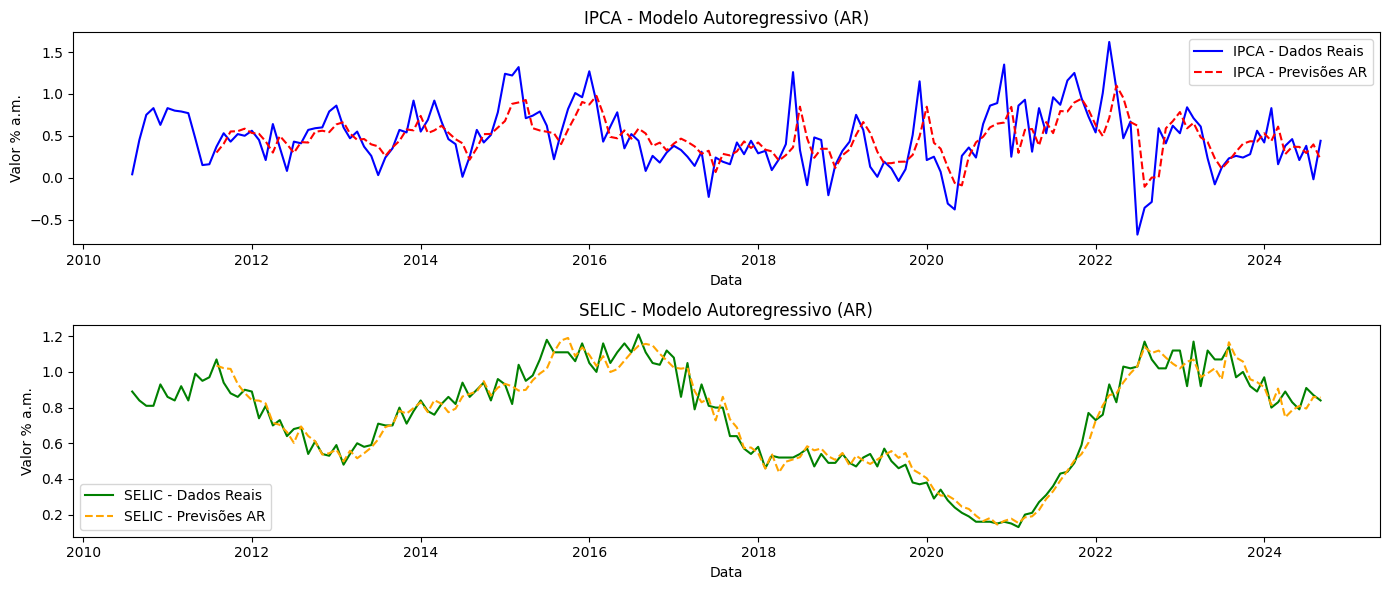

In [11]:
# Plot dos gráficos de linha com previsões
plt.figure(figsize=(14, 6))
# IPCA
plt.subplot(2, 1, 1)
plt.plot(ipca['data'], ipca['valor'], label='IPCA - Dados Reais', color='blue')
plt.plot(ipca['data'], ipca_predictions, label='IPCA - Previsões AR', color='red', linestyle='--')
plt.title('IPCA - Modelo Autoregressivo (AR)')
plt.xlabel('Data')
plt.ylabel('Valor % a.m.')
plt.legend()
# SELIC
plt.subplot(2, 1, 2)
plt.plot(selic['data'], selic['valor'], label='SELIC - Dados Reais', color='green')
plt.plot(selic['data'], selic_predictions, label='SELIC - Previsões AR', color='orange', linestyle='--')
plt.title('SELIC - Modelo Autoregressivo (AR)')
plt.xlabel('Data')
plt.ylabel('Valor % a.m.')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# Exibição dos parâmetros do modelo
print("Parâmetros do modelo AR para IPCA:")
print(ipca_model_fitted.params)
print("\nParâmetros do modelo AR para SELIC:")
print(selic_model_fitted.params)

Parâmetros do modelo AR para IPCA:
const        0.144767
valor.L1     0.494963
valor.L2     0.075613
valor.L3     0.065024
valor.L4    -0.068080
valor.L5    -0.064533
valor.L6    -0.014543
valor.L7     0.019487
valor.L8     0.032557
valor.L9     0.087390
valor.L10    0.044123
valor.L11    0.013443
valor.L12    0.005943
dtype: float64

Parâmetros do modelo AR para SELIC:
const        0.032966
valor.L1     0.382834
valor.L2     0.556263
valor.L3     0.439258
valor.L4    -0.157676
valor.L5     0.006953
valor.L6    -0.138821
valor.L7    -0.004233
valor.L8    -0.002224
valor.L9    -0.010411
valor.L10   -0.232667
valor.L11   -0.214516
valor.L12    0.329806
dtype: float64
